In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy as sp
import glob
import os
from omegaconf import OmegaConf

import matplotlib.pyplot as plt
import pathlib
from matplotlib import cm
plt.style.use('bmh')
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['figure.facecolor'] = '#FFFFFF'

In [10]:
df = pd.read_csv('dmc_planet_bench.csv')

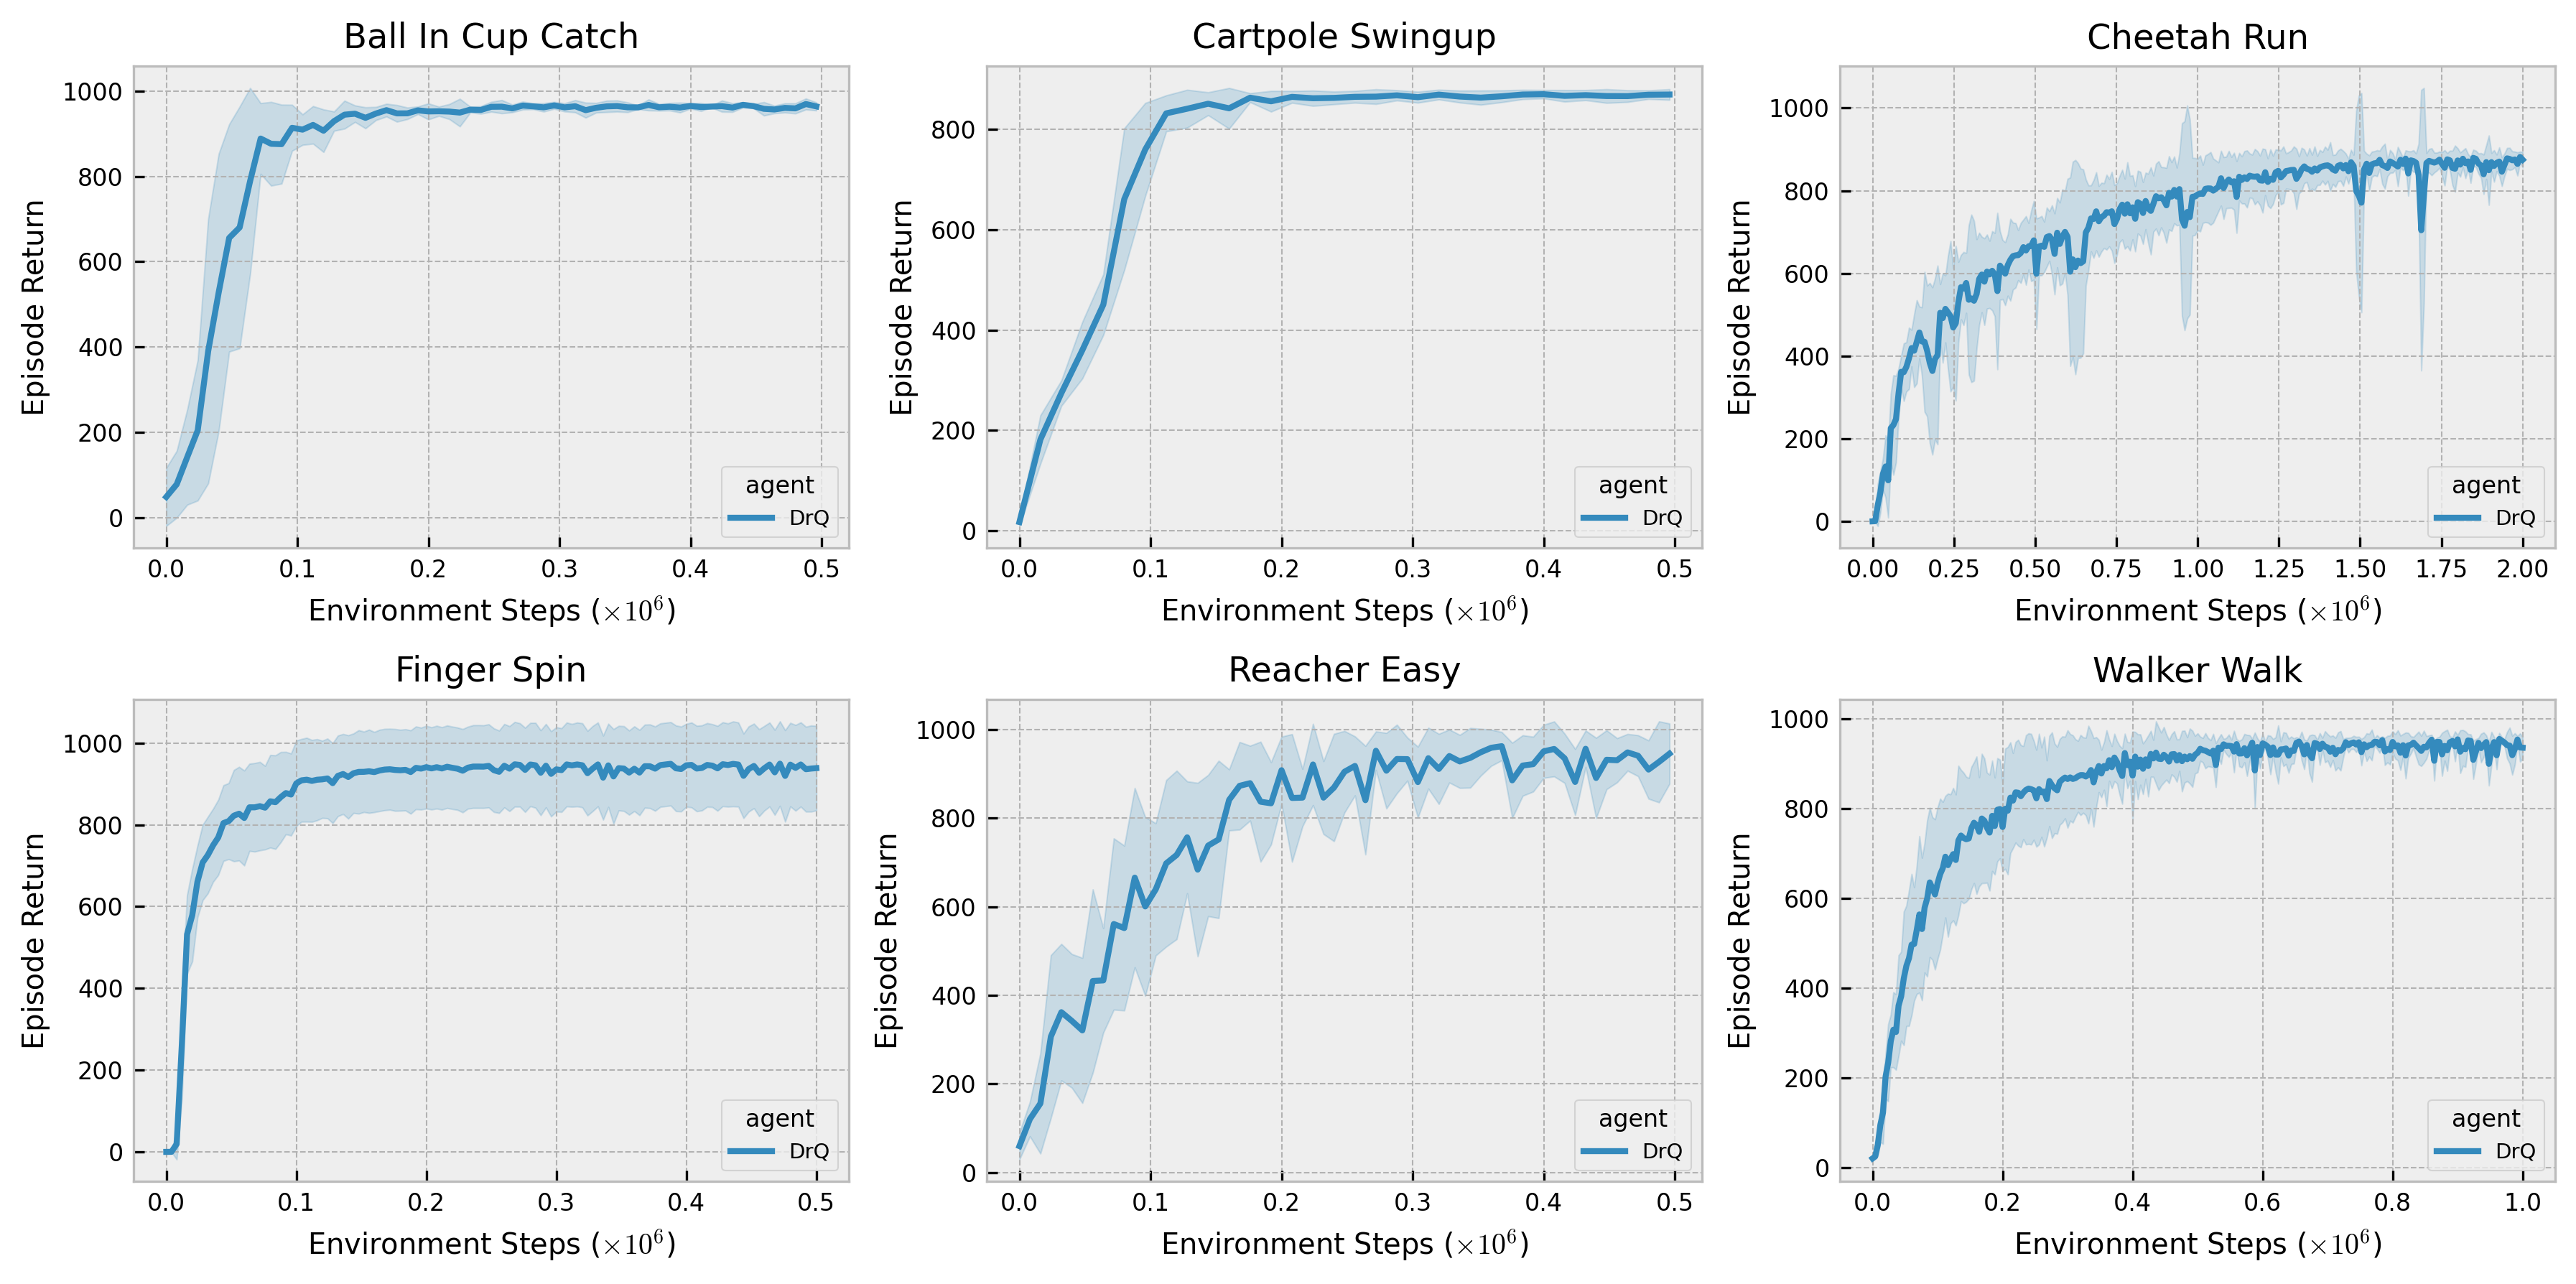

In [11]:
envs = sorted(df['env'].unique())

env_names = dict()
for env in envs:
    p = [x.capitalize() for x in env.split('_')]
    env_names[env] = ' '.join(p)

cutoff = {
    'reacher_easy': 500,
    'walker_walk': 1000,
    'cheetah_run': 2000,
    'finger_spin': 500,
    'ball_in_cup_catch': 500,
    'cartpole_swingup': 500,
}

nrow = 2
ncol = len(envs) // nrow

fig, axs = plt.subplots(nrow, ncol, figsize=(4 * ncol, 3 * nrow))


df['scaled_step'] = df['step'] / 1000000.




for idx, env in enumerate(envs):
    data = df[df['env'] == env]
    data = data[data['episode'] <= cutoff[env]]
    row = idx // ncol
    col = idx % ncol
    ax = axs[row, col]
    sns.lineplot(x='scaled_step', y='episode_reward', data=data, ci='sd', hue='agent', ax=ax)
    ax.set_xlabel('Environment Steps ($\\times 10^6%$)')
    ax.set_ylabel('Episode Return')
    ax.set_title(f'{env_names[env]}')
    

plt.tight_layout()
plt.show()